In [1]:
# ##################################################################################
# Archimedes, Measurement of a circle
# ----------------------------------------------------------------------------------
#
# Development of the Archimedes equations for inner and outer polygon.
# Version 0.1
# 
# developed, written and tested in 2023 by Dr. Peter Netz
#
# Published under the MIT-Licence.
# Copyright (c) 2023, Dr. Peter Netz
#
# I would be pleased to be mentioned if this work is useful and used for further
# studies.
#
# This is the complete theory of the inscribed and circumscribed polygon for
# calculating pi based on the theory of Archimedes (plus algorithms).
#
# Archimedes, Measurement of a circle, Proposition 3 Part I contains the 
# solution for the calculation of an approximation of pi via circumscribed outer 
# polygons. The derivation carried out by hand is checked below with SageMath 
# using a symbolic calculation. The derivation can be checked using an iterative 
# algorithm. 
#
# The following derivations are almost completely automated, so that errors can be 
# avoided. Some terms had to be used and edited by copy and paste in order to use 
# them specifically.
# 
# Open issues are:
# How can an expression be extracted from a square root in symbolic calculus.
#
# To-Do: 
# Carry out further calculations. Improvement of the documentation. Optimisation 
# and improvement of the derivations. Check the influence of square roots on the
# calculations  
# 
# ----------------------------------------------------------------------------------
# References
#
# [1] T. L. HEATH, Sc.D., The Works of Archimedes, EDITED IN MODERN NOTATION, 
# WITH INTRODUCTORY CHAPTERS, CAMBRIDGE: AT THE UNIVERSITY PRESS, 1897
# [2] Dr. Saskia Roos, Michael Jung, An Introductory Course on Sage, Lecture
# Notes Summer Term 2020, University of Potsdam, Sep 30, 2020
# [3] SageMath, The Sage Development Team, Symbolic Calculus, Release 10.1, 
# Aug 21, 2023
# [4] SageMath, the Sage Mathematics Software System (Version 10.1), The Sage
# Developers, https://www.sagemath.org, 2019
# [5] mathworld.wolfram.com/ArchimedesAlgorithm.html
# ##################################################################################

In [2]:
html("""<font color='purple'><b><H1>User defined functions</H1></b></font><br/>""")

<font color='purple'><b><H1>User defined functions</H1></b></font><br/>

In [3]:
# User defined function println for printing lines.
def println(exp):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line. We have to take care that an SageMath expressions is 
    converted to a string before printing.'''
    # Convert the type of line to a string.
    line = str(exp)
    # Print text, a line or a string to the notebook.
    print("\n{0}\n".format(line))
    # End of func

In [4]:
# Initialise the global variables.
EqNo = 0
LnLen = 80
# LnLen = -1 <- Disabled global LnLen

# User defined function println_eqno for printing equations.
def println_eqno(exp, lnlen=80):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line.'''
    global EqNo, LnLen
    if LnLen != -1:
        lnlen = LnLen
    # Convert the type of line to a string.
    line = str(exp)
    # Calculate the necessary number of spaces. 
    spclen = lnlen - len(line)
    # Create the string with the spaces.
    space = "".join(u'\u0020' for i in range(spclen))
    # Print text, a line or a string to the notebook.
    EqNo += 1
    print("\n{0}{1}(Equation {2})\n".format(line, space, EqNo))
    exp.show()
    # End of function. Return None.
    return None

In [5]:
def plot_figure(imgfn, xsize=8, ysize=8):
    '''Use matlibplot to show an image.'''
    # Import the matplotlib modules by name.
    import matplotlib.pyplot as plt
    import matplotlib.image as img
    import matplotlib.image as figure
    # Read the PNG graphic file.
    img = img.imread(imgfn) 
    # Do not show axes and frame.
    plt.axis('off')
    # Scale the image on the notebook.
    # plt.rcdefaults() resets the image size.
    plt.rcParams['figure.figsize'] = [xsize, ysize]
    # Change the paramter for a larger or a smaller graphic.   
    # plt.title('Title of the graphic') adds a title to the image.
    plt.imshow(img)
    plt.show()
    # End of function. Return None.
    return None

In [6]:
# User defined function fractional number.
def fractional_number(decnum, maxexp, ROUND=True):
    '''Generator for calculating a fractional number from a given decimal 
    number. The generator can run infinite. Rounding to the correct value
    is done by the Python function round().'''
    # Initialise the counter for the exponent to base 10.
    exp = 0
    # Initialise numerator and denominator.
    nr = ''
    dr = ''
    # Initialise the potential value.
    potval = 0
    if ROUND is True:
        decnum = str(round(decnum, maxexp))
    # Run an infinite loop.
    while exp <= maxexp:
        decnum = float(decnum)
        # Cut off the decimal places.
        bd = str(decnum).split('.')[0]
        ad = str(decnum).split('.')[1]
        decpls = float("0." + ad)
        # Cut off the number before the decimal point.
        decnum = int(decnum)
        # Join the integer numbers.
        dr = dr + str(decnum)
        # Calculate the denominator.
        potval = 10^exp
        # Get the denominator number.
        nr = str(potval)
        # Multiply the decimal places with 10.
        decpls *= 10
        # Store the new decimal number.
        decnum = decpls
        # Increment the exponential counter.
        exp += 1
        # Return the numerator and the denominator.
    return nr, dr

In [7]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of the related Figure</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of the related Figure</H1></b></font><br/>

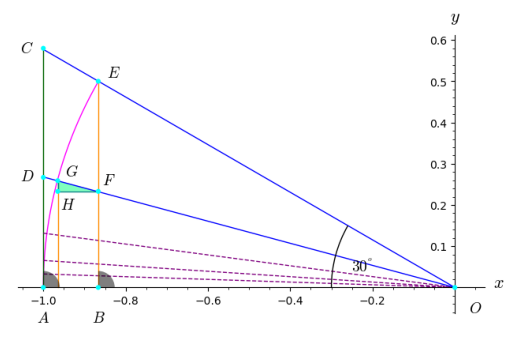

In [8]:
plot_figure("archimedes_figure_alt.png")

In [9]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>
Derivation of the iterative determination equations</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>
Derivation of the iterative determination equations</H1></b></font><br/>

In [10]:
# The derivation based on Archimedes for the inner and outer polygon are 
# exactly the same at first glance. The difference with the inner polygon
# lies in the consideration of the triangle FGH. This is done at the end 
# of the derivation.

In [11]:
# Introduce a simple relation from the given figure.
var('AD AC CD BE EF BF')
eq0 = AC == CD + AD
eq0a = BE == EF + BF
println("The straight line AC can be divided in point D:")
println(eq0)
println("The straight line BE can be divided in point F:")
println(eq0a)


The straight line AC can be divided in point D:


AC == AD + CD


The straight line BE can be divided in point F:


BE == BF + EF



In [12]:
# Apply Euclid Book VI Proposition 3.
var('OC OA CD AD OE OB')
println("Applying Euclid Book VI Proposition 3 results in (outer polygon):")
eq1 = OC / OA == CD / AD
println_eqno(eq1)
println("Applying Euclid Book VI Proposition 3 results in  (inner polygon):")
eq1a = OE / OB == EF / BF
println_eqno(eq1a)


Applying Euclid Book VI Proposition 3 results in (outer polygon):


OC/OA == CD/AD                                                                  (Equation 1)



OC/OA == CD/AD


Applying Euclid Book VI Proposition 3 results in  (inner polygon):


OE/OB == EF/BF                                                                  (Equation 2)



OE/OB == EF/BF

In [13]:
# Solve the equation for DA.
eq2 = solve(eq1, AD)
println("The equation is transformed according to AD:")
println_eqno(eq2[0])
eq2a = solve(eq1a, BF)
println("The equation is transformed according to BF:")
println_eqno(eq2a[0])


The equation is transformed according to AD:


AD == CD*OA/OC                                                                  (Equation 3)



AD == CD*OA/OC


The equation is transformed according to BF:


BF == EF*OB/OE                                                                  (Equation 4)



BF == EF*OB/OE

In [14]:
# Solve the equation for DA.
println("The equation AC = CD + AD is transformed according to CD:")
eq3 = solve(eq0, CD)
println_eqno(eq3[0])
println("The equation BE = EF + BF is transformed according to BF:")
eq3a = solve(eq0a, BF)
println_eqno(eq3a[0])


The equation AC = CD + AD is transformed according to CD:


CD == AC - AD                                                                   (Equation 5)



CD == AC - AD


The equation BE = EF + BF is transformed according to BF:


BF == BE - EF                                                                   (Equation 6)



BF == BE - EF

In [15]:
eq3a = CD == AC - AD 
eq3b = AD == CD*OA/OC
eq3c = eq3b.substitute(CD=AC-AD )
println("We are using:")
println(eq3a)
println("And we are using:")
println(eq3b)
println("Finally the relation AC = CD + AD is used in relation AD = CD*OA/OC:")
println(eq3c)


We are using:


CD == AC - AD


And we are using:


AD == CD*OA/OC


Finally the relation AC = CD + AD is used in relation AD = CD*OA/OC:


AD == (AC - AD)*OA/OC



In [16]:
eq3aa = EF == BE - BF 
eq3bb = BF == EF*OB/OE
eq3cc = eq3bb.substitute(EF=BE-BF )
println("We are using:")
println(eq3aa)
println("And we are using:")
println(eq3bb)
println("Finally the relation BE = EF + BF is used in relation BF = EF*OB/OE:")
println(eq3cc)


We are using:


EF == BE - BF


And we are using:


BF == EF*OB/OE


Finally the relation BE = EF + BF is used in relation BF = EF*OB/OE:


BF == (BE - BF)*OB/OE



In [17]:
html("""<font color='green'><b><H1>Archimedes, Measurement of a Circle<br>Determination equations</H1></b></font><br/>""")

<font color='green'><b><H1>Archimedes, Measurement of a Circle<br>Determination equations</H1></b></font><br/>

In [18]:
var('AC AD OA OC')
eq4 = solve(AD == eq3c.rhs(), AD)
println("The first determining equation is:")
eq4 = solve(AD == eq3c.rhs(), AD)
println_eqno(eq4[0])
eq4a = eq4[0]
# PDF viewer.
#view(eq5, viewer='pdf')
println("The first determining equation is:")
eq4bb = solve(BF == eq3cc.rhs(), BF)
#println_eqno(eq4bb)
println_eqno(eq4bb[0])


The first determining equation is:


AD == AC*OA/(OA + OC)                                                           (Equation 7)



AD == AC*OA/(OA + OC)


The first determining equation is:


BF == BE*OB/(OB + OE)                                                           (Equation 8)



BF == BE*OB/(OB + OE)

In [19]:
var('IG GH FG OF')
# We need to add GH to BF to get the edge.
eqA = FG == OA - OF
println_eqno(eqA)
eqB = GH == (FG / OF) * BF
println_eqno(eqB)
eqC = OE == OA
println(eqC)
eqD = IG == BF + GH
println(eqD)
eqE = IG == BF
println(eqE)


FG == OA - OF                                                                   (Equation 9)



FG == OA - OF


GH == BF*FG/OF                                                                  (Equation 10)



GH == BF*FG/OF


OE == OA


IG == BF + GH


IG == BF



In [20]:
var('OD AD OA')
# Solve the equation for OD.
eq5 = solve([OD^2 == OA^2 + AD^2 ], OD)
println("The second determining equation is:")
println_eqno(eq5[1])
eq5a = eq5[1]
# PDF viewer.
#view(eq5, viewer='pdf')
println("The second determining equation is:")
var('OE')
eq5 = solve([OE^2 == OB^2 + BF^2 ], OE)
println_eqno(eq5[1])


The second determining equation is:


OD == sqrt(AD^2 + OA^2)                                                         (Equation 11)



OD == sqrt(AD^2 + OA^2)


The second determining equation is:


OE == sqrt(BF^2 + OB^2)                                                         (Equation 12)



OE == sqrt(BF^2 + OB^2)

In [21]:
# After the first iteration Eq. 1 and Eq. 2 are the start values for the
# next iteration. Eq. 1 is the new length of the hypothenuse and Eq. 2 is
# the new length of the edge. Archimedes did this for (6), 12, 24, 48 and
# 96 edges.

In [22]:
html("""<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Algorithmus</H1></b></font><br/>""")

<font color='orangered'><b><H1>Archimedes, Measurement of a Circle<br>Algorithmus</H1></b></font><br/>

In [23]:
# Delete all user-defined variables, reset all global variables back to their
# default states, and reset all interfaces to other computer algebra systems.
reset('AC OA OC AD OD')

In [24]:
# Inner polygon
# -------------

# Outer polygon.
OA = 1
AC = 1/sqrt(3)
OC = 2 / 3 * sqrt(3)

# Inner polygon
OE = 1
BE = OE * (AC/OC)
OB = sqrt(OE^2 - BE^2)

# Number of iterations. 5 means up to a 96-gon.
numiter = 5

for i in range(0, numiter):
    # Calculate number of edges.
    n = 6 * 2^i
    # Print number of edges.
    print(n)
    # No iteration on first loop.
    if i == 0:
        # Print value of Pi.
        print(((BE * 2 * n)/2).n())
    else:    
        # Calculate hypotenuse and length of edge.
        BF = BE*OB/(OB + OE) 
        OF = sqrt(OB^2 + BF^2)
        FG = OA - OF
        GH = (FG/OF) * BF
        EL = BF + GH
        # Calculate approximation for pi.
        api = ((EL * 2 * n) / 2).n()
        # Store values.
        BE = BF
        OE = OF
        # Print value of Pi.
        print(api)

6
3.00000000000000
12
3.10582854123025
24
3.13262861328124
48
3.13935020304687
96
3.14103195089051
